In [3]:
import torch

context = []
attn_indices = []
ks = []

for i in range(5):
    state = torch.load(f'../../cache/llama/ensemeble/model_{i}.pth', map_location='cpu')
    if i ==0:
        q_timber = state['q_timber']
        k = state['k']
        v = state['v']
        mask_k = state['mask_k']
        block_size_q = state['block_size_q']
        block_size_k = state['block_size_k']
    context.append(state['attn_output_timber'])
    attn_indices.append(state['indices'])
    ks.append(state['ks'])


In [4]:
context[0].shape

torch.Size([40, 2048, 128])

In [12]:
print(q_timber.shape) # N*H, TDST, HID
print(k.shape) # N*H, TSRC, HID
print(v.shape) # N*H, TSRC, HID
print(mask_k)
print(block_size_q)
print(block_size_k)
print(q_timber.shape[1]//block_size_q)
print(mask_k//block_size_k)
# q_timber = q[:, min(DENSE_QUERIES, TDST):LAST_DENSE_QUERIES, :]
# k[:, :LAST_DENSE_QUERIES, :]
# v[:, :LAST_DENSE_QUERIES, :]

torch.Size([40, 2048, 128])
torch.Size([40, 4096, 128])
torch.Size([40, 4096, 128])
512
16
2
128
256


In [7]:
attn_indices[0].shape

torch.Size([40, 128, 256])

In [8]:
# indices : [40, 128, 256] = [N, TDST//BLOCK_SIZE_Q, mask_k//BLOCK_SIZE_K]
attn_indices[0]

tensor([[[  32,   34,   36,  ..., 2068, 2070, 2072],
         [  16,   18,   20,  ..., 2080, 2082, 2084],
         [  32,   34,   36,  ..., 2084, 2086, 2088],
         ...,
         [  14,   16,   18,  ..., 4070, 4072, 4074],
         [ 126,  128,  130,  ..., 4094, 4096, 4098],
         [  16,   18,   20,  ..., 4090, 4092, 4094]],

        [[   0,    2,    4,  ..., 2004, 2048, 2050],
         [   0,    2,    4,  ..., 2024, 2026, 2028],
         [   0,    2,    4,  ..., 2092, 2094, 2096],
         ...,
         [  78,   80,   82,  ..., 4004, 4034, 4036],
         [  78,   80,   82,  ..., 3830, 4050, 4052],
         [  80,   82,   84,  ..., 3650, 3652, 3654]],

        [[   0,    2,    4,  ..., 1940, 1942, 1944],
         [   4,    6,    8,  ..., 1986, 2064, 2066],
         [   0,    2,    4,  ..., 2104, 2106, 2108],
         ...,
         [ 130,  132,  134,  ..., 4004, 4034, 4036],
         [   0,    2,    4,  ..., 4020, 4050, 4052],
         [ 120,  122,  124,  ..., 3970, 3972, 3974]],

In [15]:
indices_flatten = attn_indices[0].view(-1, attn_indices[0].shape[-1])
print(indices_flatten.shape)

torch.Size([5120, 256])


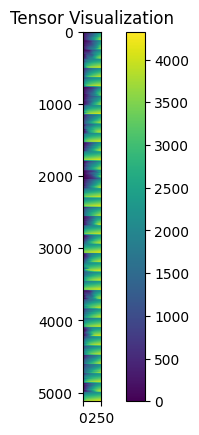

In [16]:
import torch
import matplotlib.pyplot as plt

# # Example: Creating a 2D tensor
# tensor = torch.rand(10, 10)  # Create a 10x10 tensor of random values

# Visualization
plt.imshow(indices_flatten, cmap='viridis')  # 'cmap' specifies the color map
plt.colorbar()  # Optional: Adds a colorbar to the side showing the scale
plt.title('Tensor Visualization')
plt.show()